# 🚀 **NASA C-MAPSS Turbofan Engine Degradation Prediction Project**

---

## 🛠️ **Project Overview**

Welcome to the **Turbofan Engine Health Monitoring Project** ✈️ — a deep dive into one of the most famous predictive maintenance datasets in the aerospace industry!

In this project, we will work with the **NASA C-MAPSS (Commercial Modular Aero-Propulsion System Simulation)** dataset 🧠, a powerful simulation framework designed to model how real aircraft engines **degrade over time** until failure.

Our goal is to build a **machine learning regression model** that can predict **how much useful life remains** in an engine — known as **RUL (Remaining Useful Life)** ⏳.

---

## 🔍 **About the Dataset**

🧩 The dataset consists of **run-to-failure time series data** collected from multiple turbofan engines operating under **different conditions** and **fault modes**.

Each engine starts from a **healthy state** and gradually degrades until it fails.  
During its life cycle, various **sensor measurements** (like temperature, pressure, vibration, etc.) are recorded for every time step.

---

## ⚙️ **What Is a Turbofan Engine?**

A **turbofan engine** is the type of engine used in most modern jet aircraft.  
It works by combining **a turbine** (for compression and combustion) with **a large fan** that produces thrust 💨.

Over time, components in the engine wear out due to:
- Temperature stress 🌡️  
- Pressure variations 🔧  
- Mechanical fatigue ⚙️  

Predicting **when the engine will fail** allows airlines to perform **maintenance before breakdowns occur**, saving money 💰 and ensuring safety 🛫.

---

## 💡 **The Core Problem**

We are dealing with a **prognostics problem** — estimating how long an engine will continue to operate before it reaches failure.

Formally:
> Predict the **Remaining Useful Life (RUL)** for each engine based on its **sensor readings** and **operational history**.

---

## 🧠 **How We Solve It**

We will apply **supervised regression algorithms** to model the relationship between:
- Engine sensor features 🧾  
- Remaining useful life (target variable) ⏱️  

Each model will be trained to **predict the RUL** for unseen engines — allowing us to simulate **predictive maintenance** in real-world scenarios.

---

## 🧭 **Project Roadmap**

1. 📂 **Data Loading & Understanding**  
2. 🧹 **Data Preprocessing & Feature Engineering**  
3. 🔬 **Exploratory Data Analysis (EDA)**  
4. 🧠 **Model Training & Evaluation**  
5. 🧾 **Experiment Tracking (MLflow)**  
6. 🛰️ **Deployment & Inference Simulation**

---

> ✨ *By the end of this notebook, we’ll have a complete ML pipeline capable of predicting engine health — bringing AI-driven maintenance closer to the skies!* 🚁💡

---


# 🛠️ Production Environment Setup
 ## 🛠️ Core Python Incantations
- **NumPy**: Summon the elemental forces of arrays and numerical computation.  
- **Pandas**: Your grimoire for taming tabular data.  
- **Matplotlib & Seaborn**: Paint your data stories with the colors of insight.  
- **SciPy**: Harness statistics to uncover hidden patterns.  
- **Joblib**: Safely store your magical artifacts (models and transformers).  
- **JSON**: Speak the language of configuration spirits.  
- **datetime, os, time**: Track time, navigate your data realm, and record every step of your journey.

## 🧰 Scikit-Learn Spells
- **Datasets & Preprocessing**: Fetch real-world datasets, scale and transform features, and generate polynomial enchantments for non-linear mysteries.  
- **Model Selection & Validation**: Split, cross-validate, and search for the perfect hyperparameters to summon the strongest models.  
- **Feature Alchemy**: Select and refine features with SelectKBest, RFE, and other mystical techniques.  
- **Regression Wizards**: From humble Linear Regression to powerful ensembles like Random Forests and Gradient Boosting, your models will bend reality.  
- **Support Vector Magic**: Tame complex patterns with SVR.  
- **Evaluation Charms**: Measure the fate of your predictions with RMSE, MAE, and R².  
- **Interpretability Orbs**: Understand the true power of your features using permutation importance and partial dependence plots.

In [3]:
# 🛠️ Advanced imports for production ML

# Suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')

# 🔧 Core Python libraries
import numpy as np           # Efficient numerical computations
import pandas as pd          # Data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns        # Advanced visualization
from scipy import stats      # Statistical functions
import joblib               # Save/load large models and preprocessing objects
import json                 # Handle JSON configs and outputs
from datetime import datetime  # Timestamping for logs
import os                   # File system operations
import time                 # Time tracking for experiments

# 🧰 Sklearn libraries - expanded for advanced ML workflows
from sklearn.datasets import fetch_california_housing  # Real-world dataset
from sklearn.model_selection import (
    train_test_split,     # Split data into train/test sets
    cross_val_score,      # Cross-validation scoring
    GridSearchCV,         # Hyperparameter tuning (grid search)
    RandomizedSearchCV    # Hyperparameter tuning (randomized search)
)
from sklearn.preprocessing import (
    StandardScaler,       # Feature scaling (zero-mean, unit variance)
    RobustScaler,         # Scaling robust to outliers
    PolynomialFeatures    # Generate polynomial features for non-linear relationships
)
from sklearn.pipeline import Pipeline, FeatureUnion  # Build modular pipelines
from sklearn.compose import ColumnTransformer         # Apply different preprocessing to columns
from sklearn.feature_selection import (
    SelectKBest,          # Univariate feature selection
    f_regression,         # Scoring function for regression
    RFE                   # Recursive feature elimination
)
from sklearn.linear_model import (
    LinearRegression,     # Baseline regression
    Ridge,                # L2-regularized regression
    Lasso,                # L1-regularized regression
    ElasticNet            # Combination of L1 and L2 regularization
)
from sklearn.ensemble import (
    RandomForestRegressor,       # Ensemble of decision trees
    GradientBoostingRegressor,   # Boosted trees for regression
    VotingRegressor              # Combine multiple regressors
)
from sklearn.svm import SVR               # Support Vector Regression
from sklearn.metrics import (
    mean_squared_error,  # Regression metric
    r2_score,            # Regression metric
    mean_absolute_error  # Regression metric
)
from sklearn.inspection import (
    permutation_importance,       # Feature importance
    PartialDependenceDisplay      # Partial dependence plots
)

# 🧪 Advanced model tracking with MLflow
import mlflow                  # Experiment tracking
import mlflow.sklearn          # Log sklearn models
from mlflow.models.signature import infer_signature  # Auto-capture input/output schema for reproducible deployment


# 🎛️ Configuration & Reproducibility

Before we start modeling, it’s crucial to **establish reproducible and scalable experiment settings**. This ensures that results are consistent, experiments are traceable, and your workflow is production-ready.

### Key Components:

1. **Reproducibility**
   - `RANDOM_STATE = 42`: Ensures that every run produces the same train/test splits, random sampling, and model results.
   - `TEST_SIZE = 0.2`: Reserves 20% of the data for final evaluation.
   - `VAL_SIZE = 0.2`: Reserves a portion of the training data for validation and hyperparameter tuning.
   - `CV_FOLDS = 5`: Use 5-fold cross-validation to evaluate models robustly.
   - `N_JOBS = -1`: Utilizes all available CPU cores to speed up computations.

2. **Organized Project Structure**
   - `MODEL_DIR = "models"`: All trained models are stored in a dedicated folder.
   - `EXPERIMENT_DIR = "experiments"`: All MLflow experiment logs, metrics, and artifacts are saved in a centralized location.
   - `os.makedirs(..., exist_ok=True)`: Ensures directories exist, preventing file errors during training or logging.

3. **MLflow Experiment Tracking**
   - `mlflow.set_tracking_uri(...)` points MLflow to the experiment folder.
   - `mlflow.set_experiment(experiment_name)` creates a named experiment for this project.
   - This allows you to **log models, metrics, and hyperparameters**, enabling easy comparison across experiments.

> 💡 **Pro Tip:** Proper configuration and tracking is like laying the foundation of a building—everything built on top will be reliable, reproducible, and easy to maintain.


In [4]:
class Config:
    # Reproducibility - Critical for production!
    RANDOM_STATE = 42
    TEST_SIZE = 0.05
    VAL_SIZE = 0.2  # NEW: Validation set for tuning
    CV_FOLDS = 5
    N_JOBS = -1  # Use all available cores
    
    # Model directories - Organized project structure
    MODEL_DIR = "models"
    EXPERIMENT_DIR = "experiments"
    
    # Create directories if they don't exist
    os.makedirs(MODEL_DIR, exist_ok=True)
    os.makedirs(EXPERIMENT_DIR, exist_ok=True)
    
config = Config()

# Initialize MLflow for experiment tracking
mlflow.set_tracking_uri(f"file://{os.path.abspath(config.EXPERIMENT_DIR)}")
experiment_name = "california_housing_advanced"
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='file:///home/abdelhadi/sair_projects/nasa_jet_1_project/experiments/973766809406881921', creation_time=1761481454672, experiment_id='973766809406881921', last_update_time=1761481454672, lifecycle_stage='active', name='california_housing_advanced', tags={}>

### Model Development Lifecycle

```
Raw Data → EDA → Preprocessing → Feature Engineering → 
Model Training → Evaluation → Deployment

✅we will go with this lifecycle one by one , and will make perfect pipeline


## 🔍 Step 1: Loading the data


In [5]:
# load the  training dataset
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['sensor_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names
col_indices = list(range(len(col_names)))
df_train = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=col_names, engine='python', usecols=col_indices)
#load the NASA's testing dataset:
     #loading the NASA's x test:
NASA_X_TEST = pd.read_csv('test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
    #loading the NASA'S y test
NASA_Y_TEST = pd.read_csv('RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])

print(df_train.shape)
print(NASA_X_TEST.shape)
print(NASA_Y_TEST.shape)

df_train.head(30)





(20631, 26)
(13096, 26)
(100, 1)


,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


## 🔍 Step 2: Exploratory Data Analysis (EDA)

Before building models, we must **understand our data**:
- Check for missing values
- Understand distributions
- Detect outliers
- Explore relationships between features

In [6]:
# Basic statistics
print("=" * 70)
print("📊 DATASET STATISTICS")
print("=" * 70)
print(df_train.describe())

📊 DATASET STATISTICS
        unit_number   time_cycles     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

       sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000

In [7]:
# Missing values check
#for training dataset
print("\n" + "=" * 70)
print("🔍 MISSING VALUES CHECK")
print("=" * 70)
print(df_train.isnull().sum())


🔍 MISSING VALUES CHECK
unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
sensor_1       0
sensor_2       0
sensor_3       0
sensor_4       0
sensor_5       0
sensor_6       0
sensor_7       0
sensor_8       0
sensor_9       0
sensor_10      0
sensor_11      0
sensor_12      0
sensor_13      0
sensor_14      0
sensor_15      0
sensor_16      0
sensor_17      0
sensor_18      0
sensor_19      0
sensor_20      0
sensor_21      0
dtype: int64


In [8]:
# Missing values check
#for NASA'S X TEST dataset
print("\n" + "=" * 70)
print("🔍 MISSING VALUES CHECK")
print("=" * 70)
print(NASA_X_TEST.isnull().sum())


🔍 MISSING VALUES CHECK
unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
sensor_1       0
sensor_2       0
sensor_3       0
sensor_4       0
sensor_5       0
sensor_6       0
sensor_7       0
sensor_8       0
sensor_9       0
sensor_10      0
sensor_11      0
sensor_12      0
sensor_13      0
sensor_14      0
sensor_15      0
sensor_16      0
sensor_17      0
sensor_18      0
sensor_19      0
sensor_20      0
sensor_21      0
dtype: int64


In [9]:
# Missing values check
#for NASAS's Y TEST dataset
print("\n" + "=" * 70)
print("🔍 MISSING VALUES CHECK")
print("=" * 70)
print(NASA_Y_TEST.isnull().sum())


🔍 MISSING VALUES CHECK
RUL    0
dtype: int64


## 🧹 Missing Values Check

All datasets were inspected, and **no missing values** were found — great news! ✅  
This means every feature is complete and ready for modeling.

If missing values were present, we could handle them using these common imputation strategies:

- **Mean** → Replace with the column’s average (for normal numeric data).  
- **Median** → Replace with the middle value (robust to outliers).  
- **Most Frequent (Mode)** → Replace with the most common value (for categorical data).

These techniques ensure data consistency and prevent model bias caused by incomplete records.


In [10]:
# Data types
print("\n" + "=" * 70)
print("📋 DATA TYPES")
print("=" * 70)
print(df_train.dtypes)


📋 DATA TYPES
unit_number      int64
time_cycles      int64
setting_1      float64
setting_2      float64
setting_3      float64
sensor_1       float64
sensor_2       float64
sensor_3       float64
sensor_4       float64
sensor_5       float64
sensor_6       float64
sensor_7       float64
sensor_8       float64
sensor_9       float64
sensor_10      float64
sensor_11      float64
sensor_12      float64
sensor_13      float64
sensor_14      float64
sensor_15      float64
sensor_16      float64
sensor_17        int64
sensor_18        int64
sensor_19      float64
sensor_20      float64
sensor_21      float64
dtype: object


In [11]:
# Data types
print("\n" + "=" * 70)
print("📋 DATA TYPES")
print("=" * 70)
print(NASA_X_TEST.dtypes)


📋 DATA TYPES
unit_number      int64
time_cycles      int64
setting_1      float64
setting_2      float64
setting_3      float64
sensor_1       float64
sensor_2       float64
sensor_3       float64
sensor_4       float64
sensor_5       float64
sensor_6       float64
sensor_7       float64
sensor_8       float64
sensor_9       float64
sensor_10      float64
sensor_11      float64
sensor_12      float64
sensor_13      float64
sensor_14      float64
sensor_15      float64
sensor_16      float64
sensor_17        int64
sensor_18        int64
sensor_19      float64
sensor_20      float64
sensor_21      float64
dtype: object


In [12]:
# Data types
print("\n" + "=" * 70)
print("📋 DATA TYPES")
print("=" * 70)
print(NASA_Y_TEST.dtypes)


📋 DATA TYPES
RUL    int64
dtype: object


## 🧩 Data Type Check

All feature data types were verified and found to be **clean and consistent** — no unexpected types detected. ✅  

If data type issues had appeared (for example, categorical columns mixed with numeric ones), we could preprocess them using:

- **One-Hot Encoding** → Convert categorical features into numerical vectors.  
- **ColumnTransformer** → Apply different preprocessing steps to different feature types.

###🔮 Distribution Analysis
Understanding feature distributions helps us:

- Identify data skewness and outliers

- Guide preprocessing decisions (scaling, transformations)

- Understand the nature of each feature

- Detect potential data quality issues

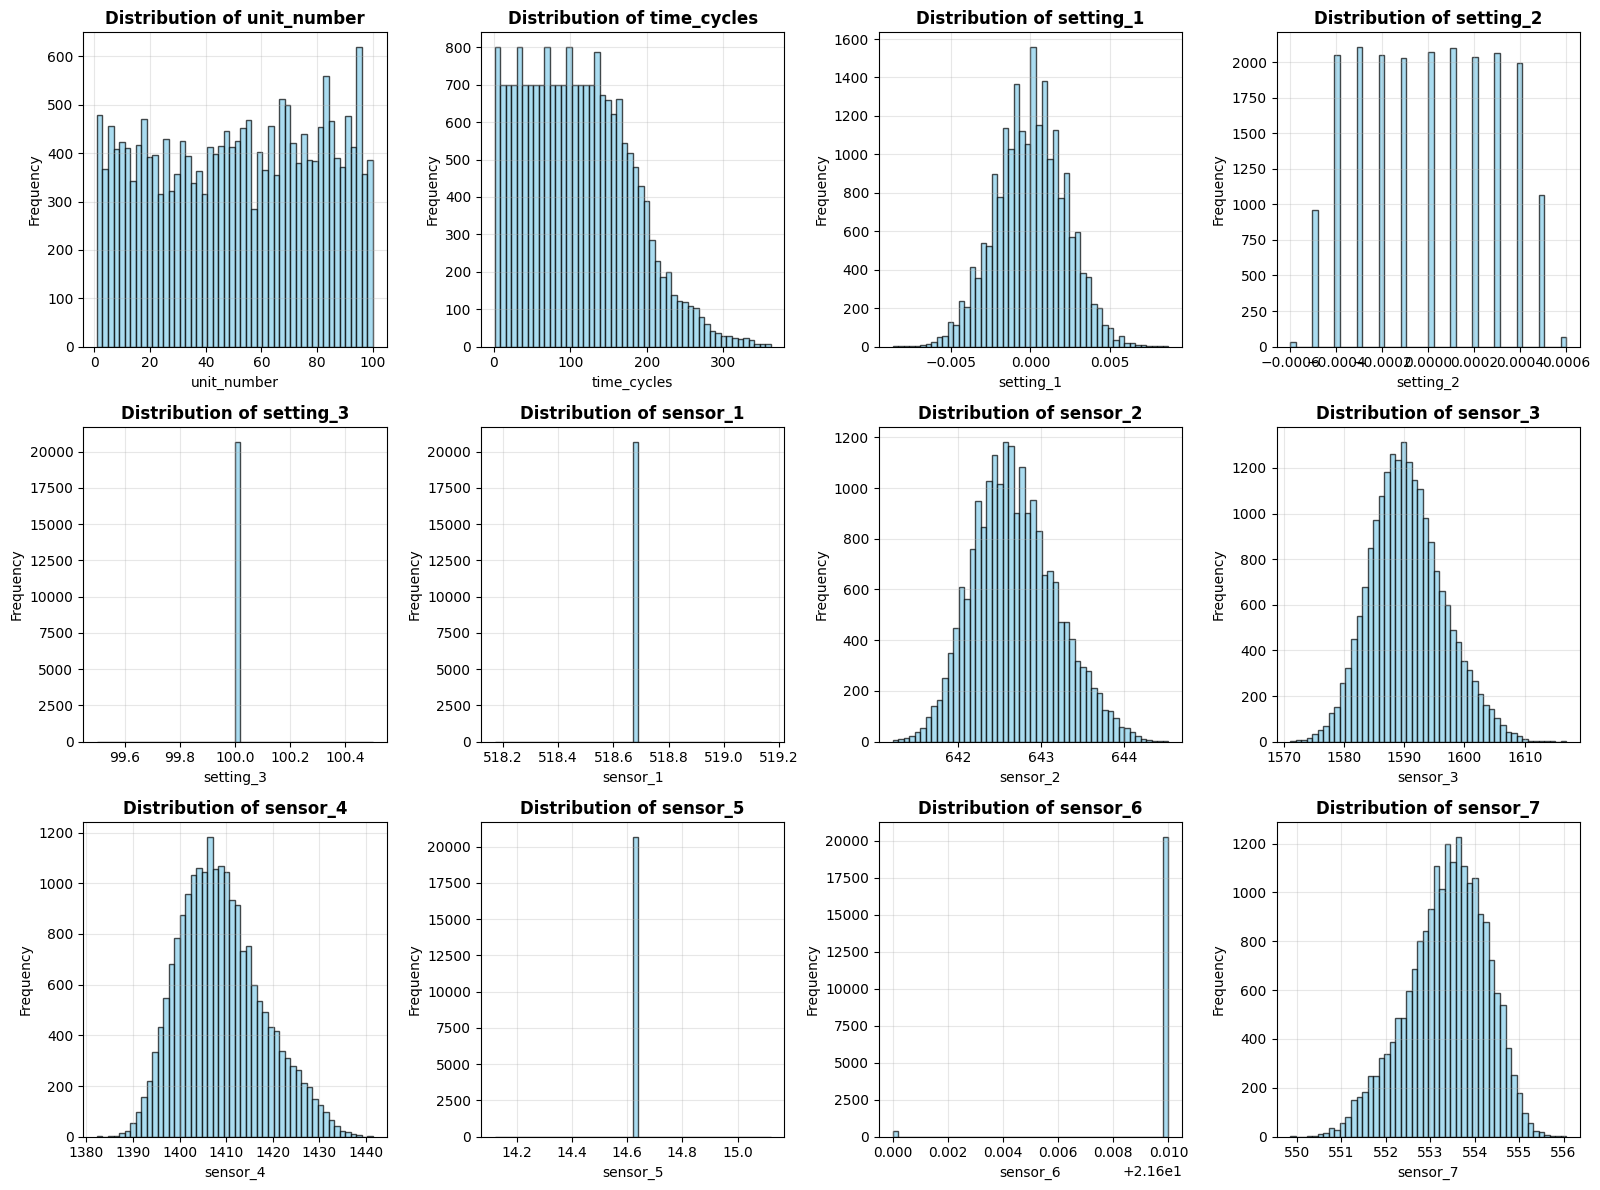

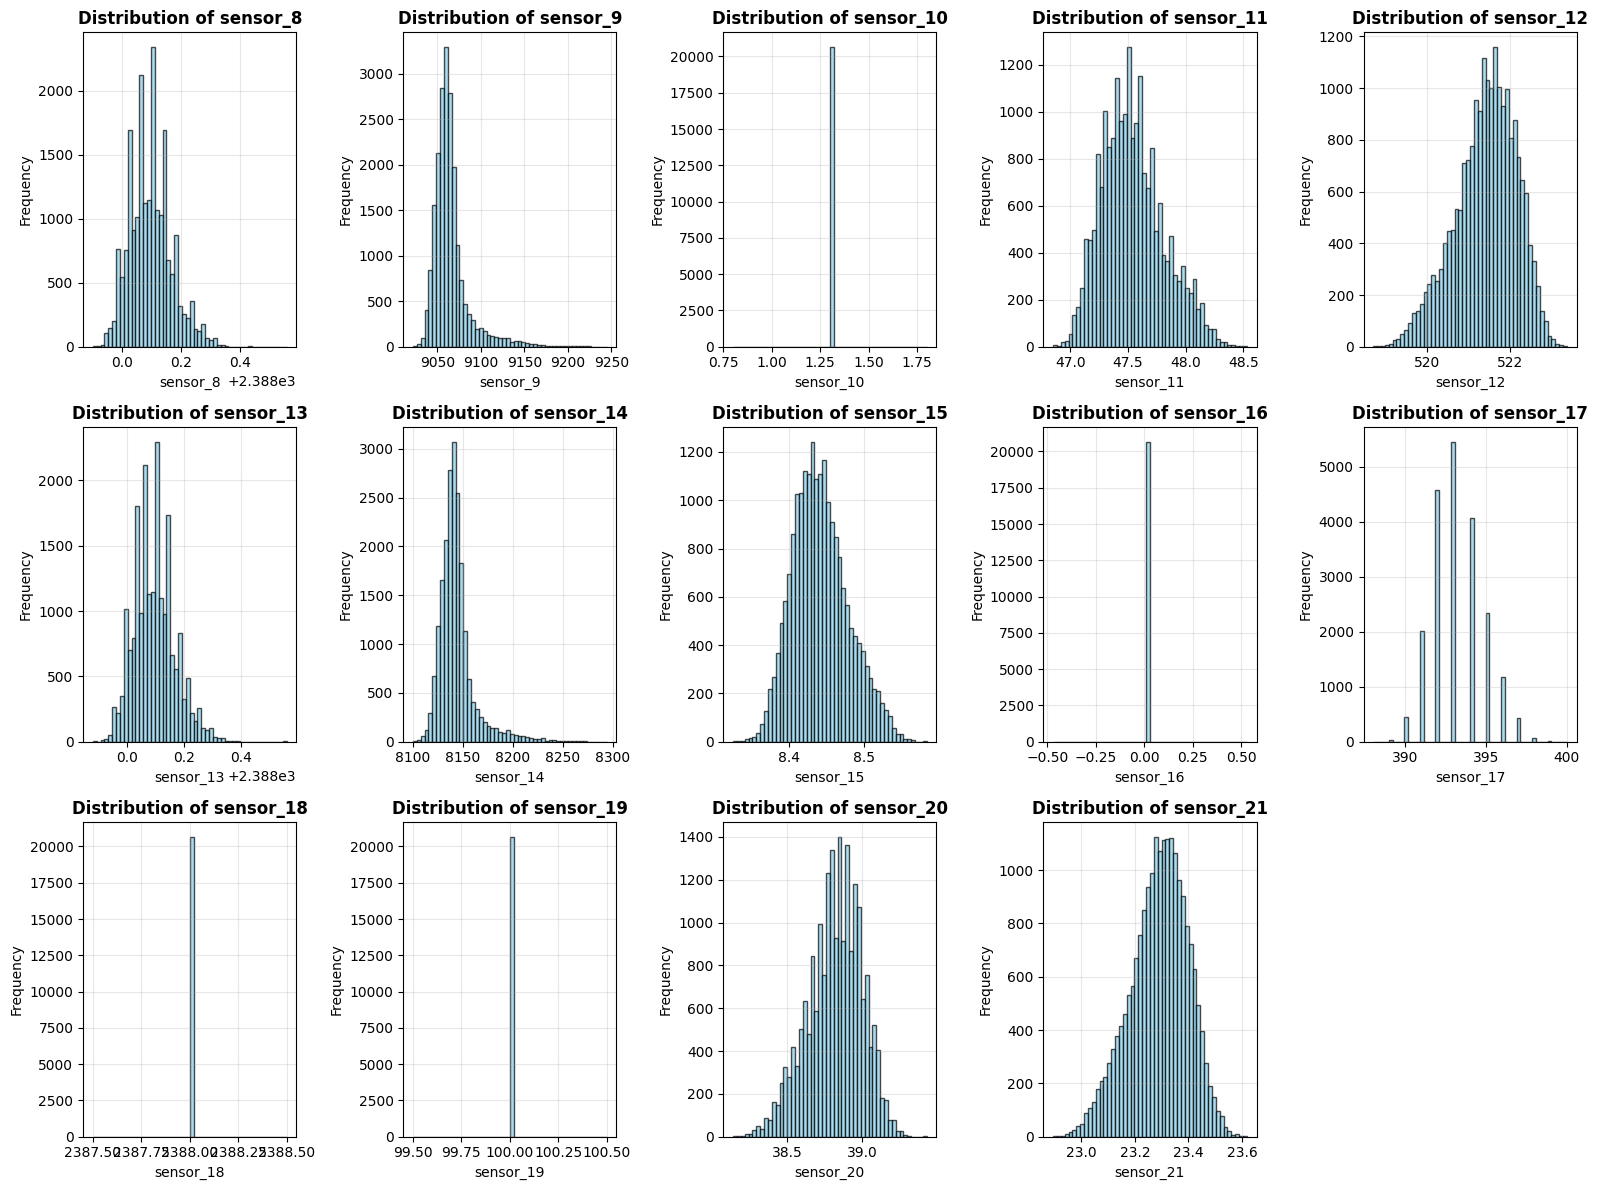

In [13]:
import matplotlib.pyplot as plt

# 🧩 Split columns into two groups
cols_part1 = df_train.columns[:12]   # First 12 columns
cols_part2 = df_train.columns[12:26] # Next 14 columns

# 🎨 Function to plot histograms for a given list of columns
def plot_histograms(df, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
    axes = axes.ravel()
    
    for i, col in enumerate(columns):
        axes[i].hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)
    
    # Hide any empty subplots (if total plots < rows*cols)
    for j in range(i + 1, rows * cols):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# 📊 Plot histograms for both parts
plot_histograms(df_train, cols_part1, rows=3, cols=4)
plot_histograms(df_train, cols_part2, rows=3, cols=5)


## 📊 Correlation Analysis

Understanding feature correlations helps us:
- Identify the most important features
- Detect multicollinearity
- Guide feature engineering

In [14]:
df_train_clean=df_train.drop( columns=[
            'setting_3', 'sensor_1', 'sensor_5', 'sensor_6', 
            'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19'
        ] )


NASA_X_TEST_clean=NASA_X_TEST.drop( columns=[
            'setting_3', 'sensor_1', 'sensor_5', 'sensor_6', 
            'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19'
        ] )
print(f'shape of df_train= {df_train_clean.shape}')
print(f'shape of NASA_X_TEST= {NASA_X_TEST_clean.shape}')
print(f'shape of NASA_Y_TEST= {NASA_Y_TEST.shape}')
df_train_clean.corr() #print  datafrmae of the train dataset

shape of df_train= (20631, 18)
shape of NASA_X_TEST= (13096, 18)
shape of NASA_Y_TEST= (100, 1)


,unit_number,time_cycles,setting_1,setting_2,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
unit_number,1.000000,0.078753,-0.017895,-0.006197,0.014133,0.012621,0.026116,-0.032073,0.039929,-0.052053,0.024707,-0.031882,0.044230,-0.059473,0.022486,0.013513,-0.020589,-0.016465
time_cycles,0.078753,1.000000,-0.004527,0.016132,0.549898,0.543947,0.624577,-0.595914,0.475977,0.443999,0.634385,-0.611354,0.477523,0.370324,0.588676,0.566995,-0.583597,-0.585923
setting_1,-0.017895,-0.004527,1.000000,0.011660,0.009030,-0.005651,0.009544,-0.009437,-0.000427,-0.004279,0.011658,-0.001491,0.002318,-0.004469,0.007652,0.002599,-0.005713,-0.014559
setting_2,-0.006197,0.016132,0.011660,1.000000,0.007266,0.009068,0.014673,-0.016678,0.013285,-0.005425,0.011690,-0.010923,0.018156,-0.006310,0.014156,0.012280,-0.010554,-0.007846
sensor_2,0.014133,0.549898,0.009030,0.007266,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050
sensor_3,0.012621,0.543947,-0.005651,0.009068,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901
sensor_4,0.026116,0.624577,0.009544,0.014673,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193
sensor_7,-0.032073,-0.595914,-0.009437,-0.016678,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447
sensor_8,0.039929,0.475977,-0.000427,0.013285,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840
sensor_9,-0.052053,0.443999,-0.004279,-0.005425,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110,-0.285280,-0.292795


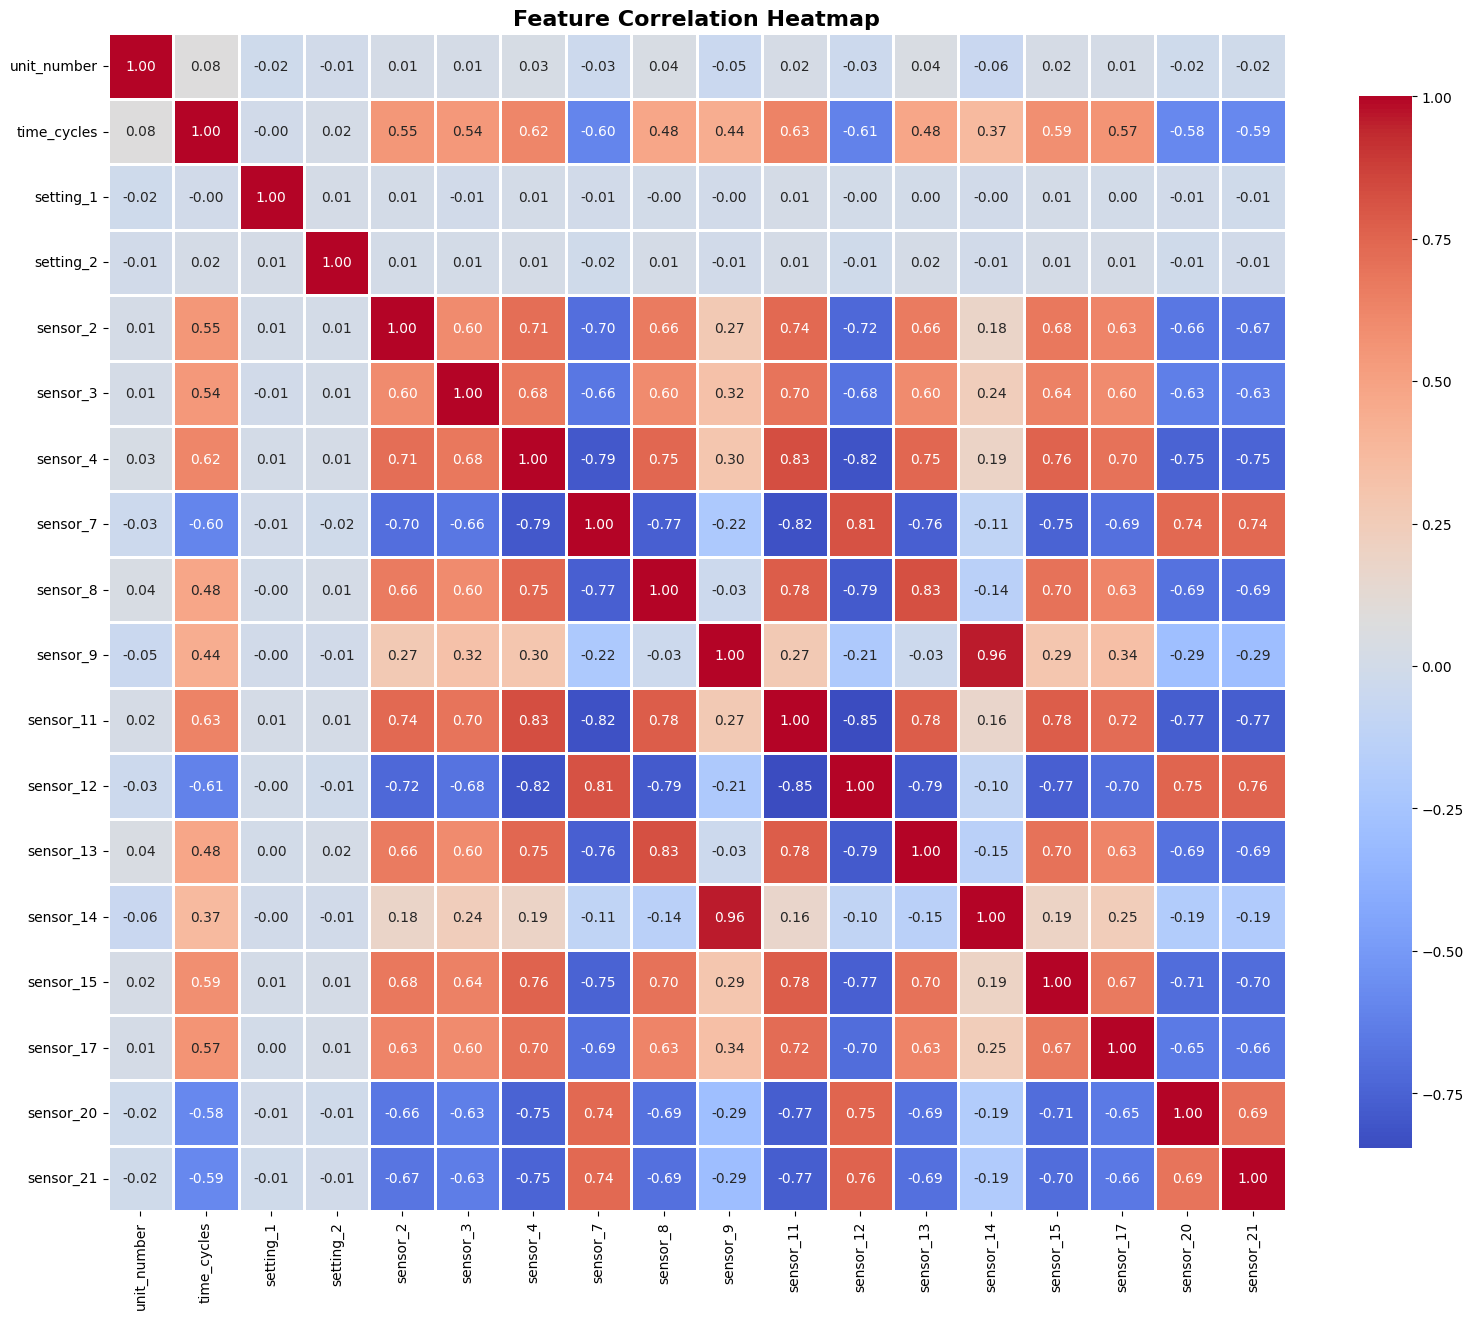


🎯 FEATURES RANKED BY CORRELATION WITH EACH OTHER

--- UNIT_NUMBER ---
time_cycles       0.0788
sensor_13         0.0442
sensor_8          0.0399
sensor_4          0.0261
sensor_11         0.0247
sensor_15         0.0225
sensor_2          0.0141
sensor_17         0.0135
sensor_3          0.0126
setting_2        -0.0062
sensor_21        -0.0165
setting_1        -0.0179
sensor_20        -0.0206
sensor_12        -0.0319
sensor_7         -0.0321
sensor_9         -0.0521
sensor_14        -0.0595

--- TIME_CYCLES ---
sensor_11         0.6344
sensor_4          0.6246
sensor_15         0.5887
sensor_17         0.5670
sensor_2          0.5499
sensor_3          0.5439
sensor_13         0.4775
sensor_8          0.4760
sensor_9          0.4440
sensor_14         0.3703
unit_number       0.0788
setting_2         0.0161
setting_1        -0.0045
sensor_20        -0.5836
sensor_21        -0.5859
sensor_7         -0.5959
sensor_12        -0.6114

--- SETTING_1 ---
setting_2         0.0117
sensor_11     

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df_train_clean.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for all numeric columns
correlation_matrix = df_train[numeric_cols].corr()

# Plot a single heatmap for all columns
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 🎯 Print ranked correlations for each column
print("\n" + "=" * 70)
print("🎯 FEATURES RANKED BY CORRELATION WITH EACH OTHER")
print("=" * 70)

for col in numeric_cols:
    correlations = correlation_matrix[col].drop(col).sort_values(ascending=False)
    print(f"\n--- {col.upper()} ---")
    for feature, corr in correlations.items():
        print(f"{feature:<15} {corr:>8.4f}")


In [16]:
# --- 4. CALCULATE RUL (Remaining Useful Life) ---
    # a. Find the maximum time cycle for each engine (unit_number)
max_cycles = df_train.groupby('unit_number')['time_cycles'].max().reset_index()
max_cycles.columns = ['unit_number', 'max_time_cycles']

    # b. Merge the max cycles back into the main DataFrame
df_train = df_train.merge(max_cycles, on='unit_number', how='left')
    # c. Calculate RUL: RUL = max_time_cycles - current time_cycles
df_train['RUL'] = df_train['max_time_cycles'] - df_train['time_cycles']
    # d. Drop the temporary 'max_time_cycles' column
df_train = df_train.drop(columns=['max_time_cycles'])
    
    # --- 5. OUTPUT RESULTS (Fixed to use simple print, avoiding tabulate error) ---
print("\n# Cleaned Data Head with New 'RUL' Column:")
print(df_train[['unit_number', 'time_cycles', 'RUL']].head(100))



#creat traing variables y and x 
y= df_train['RUL']
x = df_train_clean ## becouse the other columns are zero variane and Using features with zero variance (Set 2 - Original Data) would be detrimental:

print(f'the shape of y is {y.shape} and the shape of x is {x.shape}')


# Cleaned Data Head with New 'RUL' Column:
    unit_number  time_cycles  RUL
0             1            1  191
1             1            2  190
2             1            3  189
3             1            4  188
4             1            5  187
..          ...          ...  ...
95            1           96   96
96            1           97   95
97            1           98   94
98            1           99   93
99            1          100   92

[100 rows x 3 columns]
the shape of y is (20631,) and the shape of x is (20631, 18)


# Part 3️⃣: Data Preprocessing & Feature Engineering


In [17]:
from sklearn.base import BaseEstimator, TransformerMixin


# RUL prediction standard: Rolling window size and EWMA span
WINDOW_SIZE = 5
EWMA_SPAN = 10

# List of sensor columns that show significant variance and predictive signal (from Task 1.6)
SENSOR_COLS_VARYING = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

# --- Advanced Feature Engineering Transformer ---
# Inherits from BaseEstimator and TransformerMixin for pipeline compatibility
class TimeSeriesFeatureEngineer(BaseEstimator, TransformerMixin):
    """
    Applies Rolling Mean, Rolling Std Dev, and EWMA to sensor data,
    grouped by engine unit, to extract degradation trends.
    """
    
    def __init__(self, window_size=WINDOW_SIZE, ewma_span=EWMA_SPAN):
        self.window_size = window_size
        self.ewma_span = ewma_span
        self.feature_names_out = None
    
    def fit(self, x, y=None):
        # This transformer does not learn parameters from the data, so fit does nothing.
        return self
    
    def transform(self, x):
        # X must be a DataFrame to use groupby and rolling functions
        if not isinstance(x, pd.DataFrame):
            # Convert NumPy array back to DataFrame using the columns we know are present
            # Note: We must know the original column names for the groupby/rolling to work correctly.
            # Assuming X here is the full DataFrame (df_train_eng or df_test_eng)
            # We use the known columns from the initial load, minus constant sensors
            
            # --- IMPORTANT: Get the names of the input features that were preserved ---
            # Columns that are *not* index, RUL, or constant (23 total)
            
            # This is complex in a pure transform, so we stick to processing the original DataFrame structure
            raise TypeError("Input to TimeSeriesFeatureEngineer must be a Pandas DataFrame.")


        X_eng = x.copy()
        
        # 1. Generate Rolling Statistics
        for feature in SENSOR_COLS_VARYING:
            
            # Rationale: Rolling Mean smooths noise and captures the underlying trend.
            X_eng[f'{feature}_rolling_mean_{self.window_size}'] = X_eng.groupby('unit_number')[feature].transform(
                lambda x: x.rolling(window=self.window_size, min_periods=1).mean()
            )
            
            # Rationale: Rolling STD captures the increase in system instability (variance) near failure.
            X_eng[f'{feature}_rolling_std_{self.window_size}'] = X_eng.groupby('unit_number')[feature].transform(
                lambda x: x.rolling(window=self.window_size, min_periods=1).std()
            ).fillna(0)
            
            # 2. Generate EWMA (Advanced Smoothing)
            # Rationale: EWMA gives more weight to recent observations, capturing degradation faster.
            X_eng[f'{feature}_ewma_{self.ewma_span}'] = X_eng.groupby('unit_number')[feature].transform(
                lambda x: x.ewm(span=self.ewma_span, adjust=False, min_periods=1).mean()
            )

        # 3. Final Feature Selection (Drop raw sensors and index columns)
        # We drop the raw sensors because their information is now contained in the smooth rolling features, 
        # and we drop the index/time columns before scaling.
        cols_to_drop = SENSOR_COLS_VARYING + ['unit_number', 'time_cycles']
        
        # This transformer is built to ONLY output the final X features used by the model
        final_X = X_eng.drop(columns=[col for col in cols_to_drop if col in X_eng.columns], errors='ignore')
        
        self.feature_names_out = final_X.columns.tolist()
        
        return final_X.values

# --- Prepare DataFrames for the Transformer (Must contain RUL for y_train split later) ---

# RUL calculation is part of the initial preprocessing, not the feature engineering transformer.


# Separate X and y for the training data


# --- Test the new pipeline-compatible class ---
engineer = TimeSeriesFeatureEngineer()
X_engineered = engineer.fit_transform(x)
NASA_X_TEST_clean_engineered = engineer.fit_transform(NASA_X_TEST_clean)

# --- Output and Verification ---
print("=" * 70)
print(f"✅ Task 2.3: Pipeline-Compatible Feature Engineering Executed")
print("=" * 70)
print(f"X_train_final Shape: {X_engineered.shape}")
print(f"Total features created: {X_engineered.shape[1]}") 
print(f"Sample of Final Feature Names: {engineer.feature_names_out[:5]}...")

print(f"NASA_X_TEST Shape: {NASA_X_TEST_clean_engineered.shape}")
print(f"NASA_X_TEST Shape: {NASA_X_TEST_clean_engineered.shape[1]}")


print("\nFinal X_engineered Head (Check data is scaled/smoothed):")


✅ Task 2.3: Pipeline-Compatible Feature Engineering Executed
X_train_final Shape: (20631, 44)
Total features created: 44
Sample of Final Feature Names: ['setting_1', 'setting_2', 'sensor_2_rolling_mean_5', 'sensor_2_rolling_std_5', 'sensor_2_ewma_10']...
NASA_X_TEST Shape: (13096, 44)
NASA_X_TEST Shape: 44

Final X_engineered Head (Check data is scaled/smoothed):


## 🧭 Outlier Handling with IQR — Making the Data More Robust

### 🧮 IQR Outlier Detection Logic

For each feature:

1. Calculate **Q1 (25th percentile)** and **Q3 (75th percentile)**.
2. Compute **IQR = Q3 − Q1**.
3. Define:
   $$
   \text{Lower Bound} = Q1 - 1.5 \times IQR
   \quad
   \text{Upper Bound} = Q3 + 1.5 \times IQR
   $$
4. Clip any values outside this range to make the distribution **more stable**.

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

# --- Outlier Handler Class ---
class OutlierHandler(BaseEstimator, TransformerMixin):
    """
    Handle outliers using the Interquartile Range (IQR) method. 
    It calculates the bounds on the training data and clips extreme values 
    in both training and test data, improving model robustness.
    """
    
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_bounds_ = None
        self.upper_bounds_ = None
    
    def fit(self, X, y=None):
        """
        Calculates the IQR bounds (Q1 - 1.5*IQR and Q3 + 1.5*IQR) for each feature.
        This must be fit ONLY on training data to prevent data leakage.
        """
        self.lower_bounds_ = []
        self.upper_bounds_ = []
        
        # X is expected to be a NumPy array here.
        for i in range(X.shape[1]):
            Q1 = np.percentile(X[:, i], 25)  # 25th percentile
            Q3 = np.percentile(X[:, i], 75)  # 75th percentile  
            IQR = Q3 - Q1  # Interquartile Range
            
            # Define the clipping bounds
            self.lower_bounds_.append(Q1 - self.factor * IQR)
            self.upper_bounds_.append(Q3 + self.factor * IQR)
        
        return self
    
    def transform(self, X):
        """Clips all values outside the calculated IQR bounds."""
        X_transformed = X.copy()
        
        # X is expected to be a NumPy array here.
        for i in range(X.shape[1]):
            lower = self.lower_bounds_[i]
            upper = self.upper_bounds_[i]
            
            # Clip the values: replace anything below the lower bound with the lower bound, 
            # and anything above the upper bound with the upper bound.
            X_transformed[:, i] = np.clip(X_transformed[:, i], lower, upper)
        
        return X_transformed
    




## 🏗️ Building the Final Preprocessing Pipeline
We’ve now developed and tested each **individual component** of our preprocessing workflow:

1. 🧠 **`AdvancedFeatureEngineer`** → creates new **domain-informed features** (e.g., distance from center, ratios, interactions).
2. 🧹 **`OutlierHandler`** → detects and **clips extreme values** using the IQR method for robust statistics.
3. 📏 **`RobustScaler`** → scales features in a way that’s **less sensitive to outliers** compared to `StandardScaler`.

In [19]:

# Create comprehensive preprocessing pipeline
preprocessor = Pipeline([
    ('feature_engineer', TimeSeriesFeatureEngineer()),  # Our new features
    ('outlier_handler', OutlierHandler(factor=1.5)),  # Handle outliers
    ('scaler', RobustScaler())  # Robust to outliers (better than StandardScaler)
])

# Apply preprocessing pipeline
print("🔄 Applying preprocessing pipeline...")
X_processed = preprocessor.fit_transform(x, y)
NASA_X_processed = preprocessor.fit_transform(NASA_X_TEST_clean,NASA_Y_TEST)

print("✅ ADVANCED PREPROCESSING PIPELINE BUILT!")
print(f"📊 Processed data shape: {X_processed.shape}")
#print(f"🎯 All feature names: {preprocessor.named_steps['feature_engineer'].get_feature_names()}")

🔄 Applying preprocessing pipeline...
✅ ADVANCED PREPROCESSING PIPELINE BUILT!
📊 Processed data shape: (20631, 44)



## 🆕 Better Approach: Train / Validation / Test Split

To solve these issues, we **add a validation set** between training and testing:

* 🧠 **Train set** → Used to train the model.
* 🧪 **Validation set** → Used to tune hyperparameters, early stopping, and model selection.
* 🧭 **Test set** → Kept **completely unseen** until the very end for final evaluation.

This separation ensures:

* ✅ Cleaner model evaluation
* ✅ More reliable hyperparameter tuning
* ✅ Reduced overfitting to the test set
* ✅ More realistic production performance estimation

---


> 💡 **Pro Tip:** Keeping the **test set locked away** until the final step is a good MLOps practice — it gives you the clearest picture of real-world performance.

## 🧱 Implementation:

In [20]:
# Improved data splitting with validation set
X_temp, X_test, y_temp, y_test = train_test_split(
    X_processed, y, test_size=config.TEST_SIZE, random_state=config.RANDOM_STATE
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=config.VAL_SIZE, random_state=config.RANDOM_STATE
)


print(f"📊 DATA SPLITS (IMPROVED from previous notebook):")
print(f"• Training: {X_train.shape[0]:,} samples (model learning)")
print(f"• Validation: {X_val.shape[0]:,} samples (hyperparameter tuning)") 
print(f"• Test: {X_test.shape[0]:,} samples (final evaluation - NEVER TOUCHED until end)")

📊 DATA SPLITS (IMPROVED from previous notebook):
• Training: 15,679 samples (model learning)
• Validation: 3,920 samples (hyperparameter tuning)
• Test: 1,032 samples (final evaluation - NEVER TOUCHED until end)


# 🆕   Models

We now we making our model set to include a **diverse mix of linear, regularized, tree-based, and ensemble learners**:

| Model Name                     | Type                  | Why We Add It 🧭                                                    |
| ------------------------------ | --------------------- | ------------------------------------------------------------------- |
| `LinearRegression`             | Linear Baseline       | A clean baseline — interpretable and fast.                          |
| `Ridge Regression`             | Regularized Linear    | Controls overfitting with L2 regularization.                        |
| `Lasso Regression`             | Regularized Linear    | Performs **feature selection** via L1 penalty.                      |
| `ElasticNet` 🆕                | Hybrid Regularization | Combines L1 + L2 — more flexible for correlated features.           |
| `RandomForestRegressor` 🆕     | Tree Ensemble         | Handles nonlinearities & interactions without feature engineering.  |
| `GradientBoostingRegressor` 🆕 | Boosting Ensemble     | Learns sequentially, improving weak learners over time.             |
| `Support Vector Regression` 🆕 | Kernel Method         | Captures complex relationships using kernel tricks.                 |
| `VotingRegressor` 🆕           | Ensemble Strategy     | Combines multiple models for **stronger, more stable performance**. |

---

## 🧱 Implementation


In [21]:
# define advanced models - Expanded from previous work
advanced_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=config.RANDOM_STATE),
    'Lasso Regression': Lasso(random_state=config.RANDOM_STATE),
    'ElasticNet': ElasticNet(random_state=config.RANDOM_STATE),  # NEW: Combines L1 + L2
    'Random Forest': RandomForestRegressor(random_state=config.RANDOM_STATE, n_jobs=config.N_JOBS),
    'Gradient Boosting': GradientBoostingRegressor(random_state=config.RANDOM_STATE),  # NEW: Sequential learning
    'Support Vector Regression': SVR(),  # NEW: Different approach
}

# NEW: Voting Ensemble - Combines multiple models
voting_ensemble = VotingRegressor([
    ('ridge', Ridge(random_state=config.RANDOM_STATE)),
    ('rf', RandomForestRegressor(random_state=config.RANDOM_STATE, n_jobs=config.N_JOBS)),
    ('gb', GradientBoostingRegressor(random_state=config.RANDOM_STATE))
])

advanced_models['Voting Ensemble'] = voting_ensemble

print(f"\n🎯 MODEL PORTFOLIO ({len(advanced_models)} models):")


🎯 MODEL PORTFOLIO (8 models):



## 🧹Step-by-Step lets build the model training and logging with mlflow 
# Helper 1: Basic Training & Evaluation
This helper focuses only on:

training the model,

predicting on both train and validation sets, and

calculating key metrics (RMSE, R², MAE, training time, overfitting gap).


In [22]:
# ===========================
# 📦 Helper 1 — Basic training and evaluation
# ===========================
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    """Train model and compute basic metrics on train and validation sets."""
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    metrics = {
        "train_rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "val_rmse": np.sqrt(mean_squared_error(y_val, y_val_pred)),
        "train_r2": r2_score(y_train, y_train_pred),
        "val_r2": r2_score(y_val, y_val_pred),
        "train_mae": mean_absolute_error(y_train, y_train_pred),
        "val_mae": mean_absolute_error(y_val, y_val_pred),
        "training_time": training_time,
        "overfitting_gap": r2_score(y_train, y_train_pred) - r2_score(y_val, y_val_pred) # EARLY DETECTION FOR OVERFITTING
    }

    return metrics, model

# Helper 2: Cross-Validation

It evaluates how well a model generalizes to **unseen data** using **cross-validation** — instead of just relying on a single train–validation split.

---

### ⚡ Step-by-step breakdown:

1. **`cross_val_score`** from `sklearn.model_selection`
   This function automatically:

   * Splits your training set into multiple folds (e.g., 5 parts).
   * Trains the model on `k-1` folds (e.g., 4 folds).
   * Tests the model on the remaining fold.
   * Repeats this process `k` times (rotating the test fold each time).

   👉 This is called **k-fold cross-validation**.


In [23]:
# ===========================
# 📦 Helper 2 — Cross-validation
# ===========================
def compute_cross_validation(model, X_train, y_train, cv_folds=config.CV_FOLDS):
    """Run cross-validation and return mean and std of R² scores."""
    cv_scores = cross_val_score(model, X_train, y_train,
                                cv=cv_folds, scoring='r2', n_jobs=config.N_JOBS)
    return cv_scores.mean(), cv_scores.std()

### 📦 Helper 3 — MLflow Logging

This helper function simplifies **experiment tracking with MLflow** by:

1. **Logging model hyperparameters** → so you know exactly how the model was configured.
2. **Logging evaluation metrics** → includes training/validation scores and cross-validation results.
3. **Saving the model artifact** → allows you to **reproduce or deploy** the exact trained model later.

> Using this function ensures that each experiment is **cleanly tracked, reproducible, and easy to compare** without cluttering your main training code.


In [24]:
# ===========================
# 📦 Helper 3 — MLflow Logging
# ===========================
def log_to_mlflow(model, metrics, cv_mean, cv_std, run_name):
    """Log params, metrics, and model to MLflow in a clean, minimal way."""
    with mlflow.start_run(run_name=run_name):
        # 1. Log hyperparameters
        mlflow.log_params(model.get_params())
        
        # 2. Log main metrics
        for k, v in metrics.items():
            if k != 'training_time':  # avoid logging long times directly
                mlflow.log_metric(k, float(v))
        mlflow.log_metric("cv_r2_mean", float(cv_mean))
        mlflow.log_metric("cv_r2_std", float(cv_std))
        
        # 3. Save model artifact
        mlflow.sklearn.log_model(model, "model")



### 🚀 Advanced Model Evaluation

This function combines the full evaluation workflow into a **clean, easy-to-follow step**:

1. **Train & Evaluate** → fits the model and computes metrics on both training and validation sets.
2. **Cross-Validation** → estimates robust performance and stability using k-fold splits.
3. **MLflow Logging** → tracks hyperparameters, metrics, and saves the model artifact for reproducibility.

> ✅ With this structure, you get **all key insights and tracking** without cluttering your main training loop.


In [25]:
def evaluate_model_advanced(model, X_train, X_val, y_train, y_val, model_name):
    """Train, evaluate, cross-validate, and log model in a clean step-by-step way."""
    # 1. Train and evaluate
    metrics, trained_model = train_and_evaluate(model, X_train, y_train, X_val, y_val)
    
    # 2. Cross-validation
    cv_mean, cv_std = compute_cross_validation(model, X_train, y_train)
    metrics["cv_r2_mean"] = cv_mean
    metrics["cv_r2_std"] = cv_std
    
    # 3. Log everything to MLflow
    log_to_mlflow(model, metrics, cv_mean, cv_std, model_name)
    
    return metrics, trained_model

### 🎯 Run & Track All Advanced Models

This loop automates the **training, evaluation, and logging** of all selected models:

1. Iterates through each model in `advanced_models`.
2. Uses the simplified `evaluate_model_advanced` function to:

   * Train the model
   * Evaluate on training & validation sets
   * Run cross-validation
   * Log everything to MLflow
3. Records metrics and trained models in dictionaries for easy reference.
4. Displays **validation R²**, **cross-validation mean ± std**, and flags potential overfitting.

> ✅ This setup ensures **consistent evaluation, reproducibility, and clean experiment tracking** without manual repetition for each model.


In [26]:
print("🚀 STARTING ADVANCED MODEL EVALUATION...")
results = {}
trained_models = {}

for name, model in advanced_models.items():
    print(f"\n🔧 Training {name}...")
    metrics, trained_model = evaluate_model_advanced(model, X_train, X_val, y_train, y_val, name)
    
    results[name] = metrics
    trained_models[name] = trained_model

    overfit_flag = "⚠️" if metrics['overfitting_gap'] > 0.1 else "✅"
    print(f"✅ {name:20} | Val R²: {metrics['val_r2']:.4f} | "
          f"CV R²: {metrics['cv_r2_mean']:.4f} ± {metrics['cv_r2_std']:.4f} {overfit_flag}")

print("\n📈 All models trained and logged to MLflow!")
print(f"💡 Launch MLflow UI with: mlflow ui --backend-store-uri {config.EXPERIMENT_DIR}")

🚀 STARTING ADVANCED MODEL EVALUATION...

🔧 Training Linear Regression...


2025/10/27 20:32:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:32:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:32:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Linear Regression    | Val R²: 0.6233 | CV R²: 0.6256 ± 0.0032 ✅

🔧 Training Ridge Regression...


2025/10/27 20:32:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:32:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:32:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Ridge Regression     | Val R²: 0.6234 | CV R²: 0.6257 ± 0.0032 ✅

🔧 Training Lasso Regression...


2025/10/27 20:32:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:32:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:32:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Lasso Regression     | Val R²: 0.6100 | CV R²: 0.6089 ± 0.0027 ✅

🔧 Training ElasticNet...


2025/10/27 20:32:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:32:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:32:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ ElasticNet           | Val R²: 0.6030 | CV R²: 0.6030 ± 0.0024 ✅

🔧 Training Random Forest...


2025/10/27 20:33:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:33:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:33:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest        | Val R²: 0.8058 | CV R²: 0.7928 ± 0.0066 ⚠️

🔧 Training Gradient Boosting...


2025/10/27 20:34:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:34:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:34:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting    | Val R²: 0.6958 | CV R²: 0.6992 ± 0.0066 ✅

🔧 Training Support Vector Regression...


2025/10/27 20:35:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:35:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:35:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Support Vector Regression | Val R²: 0.6282 | CV R²: 0.6212 ± 0.0055 ✅

🔧 Training Voting Ensemble...


2025/10/27 20:37:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:37:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:37:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Voting Ensemble      | Val R²: 0.7345 | CV R²: 0.7311 ± 0.0056 ✅

📈 All models trained and logged to MLflow!
💡 Launch MLflow UI with: mlflow ui --backend-store-uri experiments


## 📊 Model Comparison & Visualization

In this section, we summarize and visualize the performance of all trained models. 

- First, we convert the `results` dictionary into a readable table.  
- Then, we create simple plots for key metrics to help interpret model performance:

1. **Validation R²** → Higher is better ✅  
2. **Validation RMSE** → Lower is better ✅  
3. **Overfitting Gap** → Closer to 0 is better ⚖️  

These visualizations make it easy for both technical and non-technical users to compare models at a glance.

📈 ADVANCED MODEL COMPARISON

🏆 MODEL PERFORMANCE RANKING
Model                     Val R²   CV R²        Overfitting  Time (s)  
--------------------------------------------------------------------------------
Random Forest              0.8058  0.7928 ± 0.0066  ⚠️  0.1673     12.71
Voting Ensemble            0.7345  0.7311 ± 0.0056   ✅  0.0920     32.56
Gradient Boosting          0.6958  0.6992 ± 0.0066   ✅  0.0297     18.96
Support Vector Regression  0.6282  0.6212 ± 0.0055   ✅  0.0019      7.43
Ridge Regression           0.6234  0.6257 ± 0.0032   ✅  0.0054      0.01
Linear Regression          0.6233  0.6256 ± 0.0032   ✅  0.0054      0.07
Lasso Regression           0.6100  0.6089 ± 0.0027   ✅  0.0003      0.28
ElasticNet                 0.6030  0.6030 ± 0.0024   ✅  0.0006      0.06


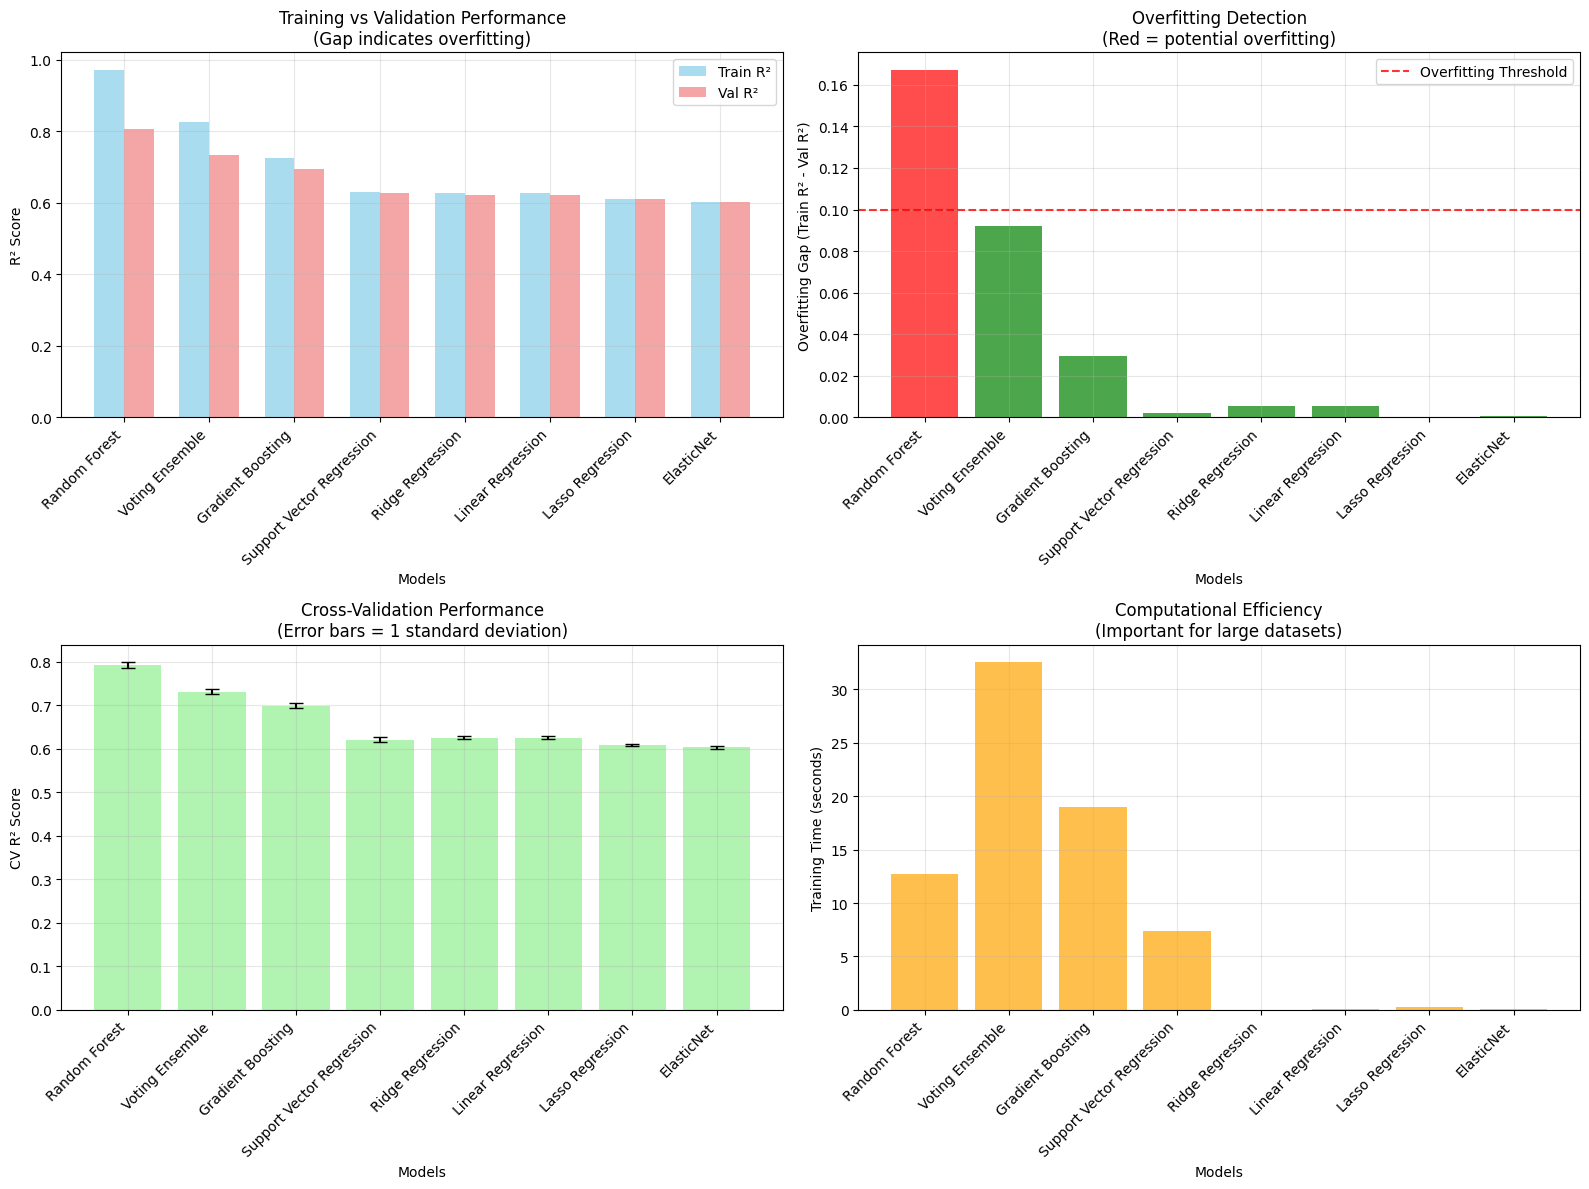


🎯 BEST MODEL SELECTED: Random Forest
📊 Validation R²: 0.8058
🔍 CV R²: 0.7928 ± 0.0066

💡 INTERPRETATION GUIDE:
• Good: High R², small train-val gap, stable CV, reasonable training time
• Overfitting: Large gap between train and validation performance
• Unstable: Large CV standard deviation
• Best choice: Balances performance, stability, and efficiency


In [27]:
# 📈 CELL 7: Advanced Model Comparison Visualization
print("📈 ADVANCED MODEL COMPARISON")

# Create comprehensive results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('val_r2', ascending=False)

print("\n" + "=" * 80)
print("🏆 MODEL PERFORMANCE RANKING")
print("=" * 80)
print(f"{'Model':<25} {'Val R²':<8} {'CV R²':<12} {'Overfitting':<12} {'Time (s)':<10}")
print("-" * 80)

for model_name in results_df.index:
    row = results_df.loc[model_name]
    overfitting_indicator = "⚠️" if row['overfitting_gap'] > 0.1 else "✅"
    print(f"{model_name:<25} {row['val_r2']:>7.4f} {row['cv_r2_mean']:>7.4f} ± {row['cv_r2_std']:>5.4f} "
          f"{overfitting_indicator:>3} {row['overfitting_gap']:>7.4f} {row['training_time']:>9.2f}")

# Comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. R² Comparison
models_ordered = results_df.index
val_r2 = [results[model]['val_r2'] for model in models_ordered]
train_r2 = [results[model]['train_r2'] for model in models_ordered]

x = np.arange(len(models_ordered))
width = 0.35

axes[0, 0].bar(x - width/2, train_r2, width, label='Train R²', alpha=0.7, color='skyblue')
axes[0, 0].bar(x + width/2, val_r2, width, label='Val R²', alpha=0.7, color='lightcoral')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('Training vs Validation Performance\n(Gap indicates overfitting)')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Overfitting Analysis
overfitting_gaps = [results[model]['overfitting_gap'] for model in models_ordered]
colors = ['red' if gap > 0.1 else 'green' for gap in overfitting_gaps]
axes[0, 1].bar(models_ordered, overfitting_gaps, color=colors, alpha=0.7)
axes[0, 1].axhline(y=0.1, color='red', linestyle='--', alpha=0.8, label='Overfitting Threshold')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('Overfitting Gap (Train R² - Val R²)')
axes[0, 1].set_title('Overfitting Detection\n(Red = potential overfitting)')
axes[0, 1].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Cross-Validation Stability
cv_means = [results[model]['cv_r2_mean'] for model in models_ordered]
cv_stds = [results[model]['cv_r2_std'] for model in models_ordered]
axes[1, 0].bar(models_ordered, cv_means, yerr=cv_stds, capsize=5, alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('CV R² Score')
axes[1, 0].set_title('Cross-Validation Performance\n(Error bars = 1 standard deviation)')
axes[1, 0].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# 4. Computational Efficiency
training_times = [results[model]['training_time'] for model in models_ordered]
axes[1, 1].bar(models_ordered, training_times, alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('Training Time (seconds)')
axes[1, 1].set_title('Computational Efficiency\n(Important for large datasets)')
axes[1, 1].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select best model
best_model_name = results_df.index[0]
best_model = trained_models[best_model_name]
print(f"\n🎯 BEST MODEL SELECTED: {best_model_name}")
print(f"📊 Validation R²: {results_df.iloc[0]['val_r2']:.4f}")
print(f"🔍 CV R²: {results_df.iloc[0]['cv_r2_mean']:.4f} ± {results_df.iloc[0]['cv_r2_std']:.4f}")

print("\n💡 INTERPRETATION GUIDE:")
print("• Good: High R², small train-val gap, stable CV, reasonable training time")
print("• Overfitting: Large gap between train and validation performance") 
print("• Unstable: Large CV standard deviation")
print("• Best choice: Balances performance, stability, and efficiency")

## Hyperparameter Optimization
I will try to tunn the models have hyperparameters like:
perparameters for several models:
- Random Forest
- Gradient Boosting
- Ridge Regression
- Voting Ensemble

> 🎯 Goal: the best output without overfiting

In [28]:
# Define comprehensive hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300],  # Number of trees
        'max_depth': [None, 10, 20, 30],       # Tree depth
        'min_samples_split': [2, 5, 10],       # Minimum samples to split
        'min_samples_leaf': [1, 2, 4],         # Minimum samples per leaf
        'max_features': ['auto', 'sqrt', 'log2']  # Features to consider for splits
    },
    
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],        # Number of boosting stages
        'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
        'max_depth': [3, 4, 5, 6],             # Maximum depth per tree
        'min_samples_split': [2, 5, 10],       # Minimum samples to split
        'subsample': [0.8, 0.9, 1.0]           # Fraction of samples for fitting
    },
    
    'Ridge Regression': {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],  # Regularization strength
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Algorithm
    },
    
    'Voting Ensemble': {
        'ridge__alpha': [0.1, 1.0, 10.0],
        'rf__n_estimators': [50, 100],
        'rf__max_depth': [10, 20],
        'gb__n_estimators': [50, 100],
        'gb__learning_rate': [0.05, 0.1]
    }
} 

## 📝 Steps: Hyperparameter Optimization

1. **Initialize storage**  
   - `tuned_models` will store the best model for each algorithm.  
   - `optimization_results` will store the best score and parameters for each model.

2. **Loop over each model**  
   - Models: Random Forest, Gradient Boosting, Ridge Regression, Voting Ensemble.  

3. **Start MLflow tracking**  
   - Each model tuning run is logged with `mlflow.start_run(run_name=model_name_tuned)`.

4. **Run RandomizedSearchCV**  
   - Tries `n_iter=20` random combinations from the model’s hyperparameter grid.  
   - Uses cross-validation (`cv=config.CV_FOLDS`) to estimate performance.  
   - Scores models using R² (`scoring='r2'`).

5. **Fit the search**  
   - Fits the model on the training data and finds the best hyperparameters.

6. **Store best results**  
   - Best model saved in `tuned_models`.  
   - Best score and parameters saved in `optimization_results`.

7. **Log everything to MLflow**  
   - Hyperparameters, best cross-validation score, and the tuned model artifact.

8. **Print summary**  
   - Shows best CV R² and the parameters found for each model.

> 🎯 Goal: Automatically find the best hyperparameter settings to maximize model performance while keeping tracking and reproducibility simple.

In [29]:

# Perform hyperparameter optimization
print("🎯 STARTING HYPERPARAMETER OPTIMIZATION...")
tuned_models = {}
optimization_results = {}

for model_name in ['Random Forest', 'Gradient Boosting', 'Ridge Regression', 'Voting Ensemble']:
    print(f"\n🔧 Tuning {model_name}...")
    
    with mlflow.start_run(run_name=f"{model_name}_tuned"):
        # Use RandomizedSearchCV for efficient optimization
        search = RandomizedSearchCV(
            advanced_models[model_name],
            param_grids[model_name],
            n_iter=20,  # Try 20 random combinations (efficient!)
            cv=config.CV_FOLDS,
            scoring='r2',
            n_jobs=config.N_JOBS,
            random_state=config.RANDOM_STATE,
            verbose=1
        )
        
        # Perform the search
        search.fit(X_train, y_train)
        
        # Store results
        tuned_models[model_name] = search.best_estimator_
        optimization_results[model_name] = {
            'best_score': search.best_score_,
            'best_params': search.best_params_,
            'best_estimator': search.best_estimator_
        }
        
        # Log to MLflow
        mlflow.log_params(search.best_params_)
        mlflow.log_metric('best_cv_score', search.best_score_)
        mlflow.sklearn.log_model(search.best_estimator_, "tuned_model")
        
        print(f"✅ {model_name:20} | Best CV R²: {search.best_score_:.4f}")
        print(f"   Best parameters found: {search.best_params_}")

print(f"\n🎉 HYPERPARAMETER OPTIMIZATION COMPLETE!")
print(f"💡 All tuned models saved in MLflow for comparison")

🎯 STARTING HYPERPARAMETER OPTIMIZATION...

🔧 Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/10/27 20:40:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:40:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:40:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest        | Best CV R²: 0.7816
   Best parameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}

🔧 Tuning Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/10/27 20:48:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:48:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:48:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting    | Best CV R²: 0.7618
   Best parameters found: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 6, 'learning_rate': 0.05}

🔧 Tuning Ridge Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/10/27 20:49:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 20:49:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 20:49:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Ridge Regression     | Best CV R²: 0.6257
   Best parameters found: {'solver': 'sparse_cg', 'alpha': 1.0}

🔧 Tuning Voting Ensemble...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/10/27 21:04:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 21:04:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/27 21:04:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Voting Ensemble      | Best CV R²: 0.7304
   Best parameters found: {'ridge__alpha': 0.1, 'rf__n_estimators': 100, 'rf__max_depth': 20, 'gb__n_estimators': 100, 'gb__learning_rate': 0.1}

🎉 HYPERPARAMETER OPTIMIZATION COMPLETE!
💡 All tuned models saved in MLflow for comparison


📊 Tuned Models Performance:


,Model,Best CV R²
0,Random Forest,0.781620
1,Gradient Boosting,0.761807
2,Ridge Regression,0.625680
3,Voting Ensemble,0.730412


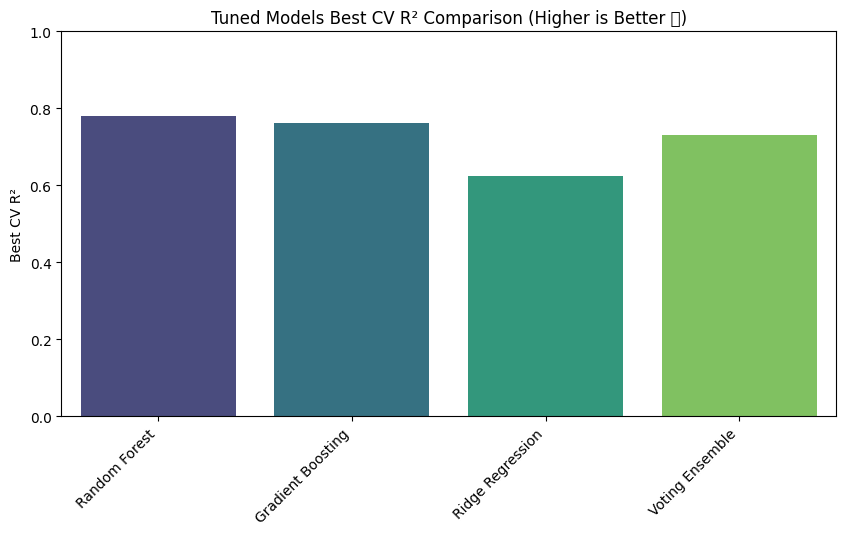

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# 1️⃣ Convert optimization results to DataFrame
# ===========================
tuned_metrics_df = pd.DataFrame.from_dict({
    model: {
        'Best CV R²': optimization_results[model]['best_score']
    } for model in optimization_results
}, orient='index').reset_index().rename(columns={'index': 'Model'})

print("📊 Tuned Models Performance:")
display(tuned_metrics_df)

# ===========================
# 2️⃣ Plot Best CV R² (Higher is better)
# ===========================
plt.figure(figsize=(10,5))
sns.barplot(data=tuned_metrics_df, x='Model', y='Best CV R²', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Tuned Models Best CV R² Comparison (Higher is Better ✅)')
plt.ylabel('Best CV R²')
plt.xlabel('')
plt.ylim(0,1)
plt.show()


# ✅ Final Test Set Evaluation


In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

best_tuned_model = tuned_models[best_model_name] # add this line 

# Predict on test set
y_test_pred = best_tuned_model.predict(X_test)

# Compute performance metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"📊 Test R²: {test_r2:.4f}")
print(f"📊 Test RMSE: {test_rmse:.4f}")
print(f"📊 Test MAE: {test_mae:.4f}")


📊 Test R²: 0.7801
📊 Test RMSE: 30.7237
📊 Test MAE: 21.5851


# 🚀 Model Deployment Preparation


In [32]:
import gradio as gr


# -------------------------------
# Load the trained Random Forest pipeline model
# -------------------------------
Random_Forest_pipeline = joblib.load("models/v1_20251027_173149/best_model.pkl")  # make sure this file exists in the same directory

# -------------------------------
# Function to predict nasa  jet engine
# -------------------------------
def jet_engine(time_cycles,setting_1,setting_2, sensor_2, sensor_3, sensor_4, sensor_7, sensor_8, sensor_9,
               sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40
          ,s41,s42,s43,s44,s45,s46,s47,s48):
    # Arrange features in the exact order used during training
    X = [[time_cycles,setting_1, setting_2, sensor_2, sensor_3, sensor_4, sensor_7, sensor_8, sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
          ,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40
          ,s41,s42,s43,s44,s45,s46,s47,s48]]
    predicted_RUL = Random_Forest_pipeline.predict(X)[0]  # Convert to $k
    return f"{predicted_RUL:.2f}"

# -------------------------------
# Predefined sample jet engine (examples)
# -------------------------------
examples = [
    # Example 1: Engine Early Life (Unit 1, Cycle 50) - Expect High RUL
    [-0.0018, 0.0003, 100.0, 643.31, 1604.99, 1424.37, 551.87, 2388.23, 9071.18, 48.06, 520.09, 2388.23, 8150.31, 8.5220, 396.11, 38.45, 23.0121,2,3,4,5,6,7,89,12,34,56,78,907 ,2,32,44,54,23,11,22,33,44,555,5,2,354,65, 0],
    # Example 2: Engine Mid Life (Unit 2, Cycle 150) - Expect Moderate RUL
    [-0.0017, -0.0004, 100.0, 642.87, 1599.04, 1419.01, 552.48, 2388.13, 9062.88, 47.88, 520.84, 2388.12, 8146.46, 8.4897, 393.64, 38.69, 23.1695,32.45,45,65,78,454,345,345 ,345,345,4523,5,4668,8,65765,3,4,6,7,89,76,45,34,45,5,6,6, 0],
    # Example 3: Engine Late Life (Unit 3, Cycle 180) - Expect Low RUL
    [-0.0018, 0.0003, 100.0, 643.31, 1604.99, 1424.37, 551.87, 2388.23, 9071.18, 48.06, 520.09, 2388.23, 8150.31, 8.5220, 396.11, 38.45, 23.0121,2,3,4,5,6,7,89,12,34,56,78,907 ,2,32,44,54,23,11,22,33,44,555,5,2,354,65, 0] 
]

# -------------------------------
# Gradio interface
# -------------------------------
iface = gr.Interface(
    fn=jet_engine,
  inputs = [
    # --- Operational Settings ---
    gr.Number(value=0.340, label="Setting 1"), 
    gr.Number(value=0.340, label="Setting 2"), 

    # --- Varying Sensor Measurements ---
    gr.Number(value=642.0, label="Sensor 2"), 
    gr.Number(value=1590.0, label="Sensor 3"), 
    gr.Number(value=1408.0, label="Sensor 4"),
    gr.Number(value=553.0, label="Sensor 7"), 
    gr.Number(value=2388.0, label="Sensor 8"), 
    gr.Number(value=9060.0, label="Sensor 9"),
    gr.Number(value=47.5, label="Sensor 11"), 
    gr.Number(value=521.0, label="Sensor 12"), 
    gr.Number(value=2388.0, label="Sensor 13"),
    gr.Number(value=8140.0, label="Sensor 14"), 
    gr.Number(value=8.45, label="Sensor 15"), 
    gr.Number(value=393.0, label="Sensor 17"),
    gr.Number(value=38.8, label="Sensor 20"), 
    gr.Number(value=23.3, label="Sensor 21"),
    gr.Number(value=2.5, label="s22"),
    gr.Number(value=3.1, label="s23"),
    gr.Number(value=4.0, label="s24"),
    gr.Number(value=5.8, label="s25"),
    gr.Number(value=6.2, label="s26"),
    gr.Number(value=7.9, label="s27"),
    gr.Number(value=8.0, label="s28"),
    gr.Number(value=12.1, label="s29"),
    gr.Number(value=34.5, label="s30"),
    gr.Number(value=56.0, label="s31"),
    gr.Number(value=78.2, label="s32"),
    gr.Number(value=90.0, label="s33"),
    gr.Number(value=2.0, label="s34"),
    gr.Number(value=32.0, label="s35"),
    gr.Number(value=44.1, label="s36"),
    gr.Number(value=54.0, label="s37"),
    gr.Number(value=23.3, label="s38"),
    gr.Number(value=11.7, label="s39"),
    gr.Number(value=22.0, label="s40"),
    gr.Number(value=33.4, label="s41"),
    gr.Number(value=44.0, label="s42"),
    gr.Number(value=555.0, label="s43"),
    gr.Number(value=5.0, label="s44"),

    # --- Constant Sensor Measurements ---
    # These are needed for the preprocessor but shouldn't be changed by the user.
],
    outputs=gr.Textbox(label="Predicted RUL "),
    title="jet engine RUL prediction",
    description="Adjust the sliders to predict the RUL of a jets  based on features.",
    examples=examples
)

# -------------------------------
# Launch the Gradio app
# -------------------------------
iface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://906217164b53a39777.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
